In [1]:
import os
import cv2 
import numpy as np
import rasterio

from scipy.ndimage import zoom, rotate
from matplotlib import pyplot as plt 


In [2]:
# T34VFJ and T35VLD = Riga


In [3]:
files = {}

for f in os.listdir("/home/kristaps/Projs/bulbulis/data"):
    if ".jp2" in f:
        parts = f.split("_")
        if parts[0] not in files:
            files[parts[0]] = {}
        if parts[1] not in files[parts[0]]:
            files[parts[0]][parts[1]] = {}
        files[parts[0]][parts[1]][parts[2]] = f"/home/kristaps/Projs/bulbulis/data/{f}"


In [4]:
dates = []
for f in files.values():
    dates += list(f.keys())
dates = sorted(list(set(dates)))
    

In [5]:
T34VFJ = np.dstack((np.full((10980, 10980), 0.0), np.full((10980, 10980), 0.0), np.full((10980, 10980), 0.0)))
T35VLD = np.dstack((np.full((10980, 10980), 0.0), np.full((10980, 10980), 0.0), np.full((10980, 10980), 0.0)))

merged = np.dstack((np.full((11380, 21960), 0.0), np.full((11380, 21960), 0.0), np.full((11380, 21960), 0.0)))


In [6]:
gain = 2

for d in dates[10:20]:
    if d in files["T34VFJ"]:
        fj = files["T34VFJ"][d]
        try:
            scl = np.repeat(np.repeat(rasterio.open(fj["SCL"], driver="JP2OpenJPEG").read(1), 2, 0), 2, 1)
            c_red = np.clip(rasterio.open(fj["B04"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1)
            c_green = np.clip(rasterio.open(fj["B03"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1) 
            c_blue = np.clip(rasterio.open(fj["B02"], driver="JP2OpenJPEG").read(1)*gain/10000, 0, 1)
            
            mask = ((scl != 0) & (scl != 1) & (scl != 3) & (scl != 7) & (scl != 8) & (scl != 9) & (scl != 10))

            print(d, "T34VFJ")
            T34VFJ[:, :, 0][mask] = c_red[mask]
            T34VFJ[:, :, 1][mask] = c_green[mask]
            T34VFJ[:, :, 2][mask] = c_blue[mask]

            offset = 280
            merged[offset:10980+offset, :10980, 0][mask] = c_red[mask]
            merged[offset:10980+offset, :10980, 1][mask] = c_green[mask]
            merged[offset:10980+offset, :10980, 2][mask] = c_blue[mask]
        except BaseException as e:
            print(e)
    if d in files["T35VLD"]:
        fj = files["T35VLD"][d]
        try:
            deg = 5
            scl = rotate(np.repeat(np.repeat(rasterio.open(fj["SCL"], driver="JP2OpenJPEG").read(1), 2, 0), 2, 1), deg, reshape=False)
            c_red = np.clip(rotate(rasterio.open(fj["B04"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
            c_green = np.clip(rotate(rasterio.open(fj["B03"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
            c_blue = np.clip(rotate(rasterio.open(fj["B02"], driver="JP2OpenJPEG").read(1), deg, reshape=False)*gain/10000, 0, 1)
            
            mask = ((scl != 0) & (scl != 1) & (scl != 3) & (scl != 7) & (scl != 8) & (scl != 9) & (scl != 10))

            print(d, "T35VLD")
            T35VLD[:, :, 0][mask] = c_red[mask]
            T35VLD[:, :, 1][mask] = c_green[mask]
            T35VLD[:, :, 2][mask] = c_blue[mask]

            s = 10980-4750
            merged[:10980, s:10980+s, 0][mask] = c_red[mask]
            merged[:10980, s:10980+s, 1][mask] = c_green[mask]
            merged[:10980, s:10980+s, 2][mask] = c_blue[mask]
        except BaseException as e:
            print(e)
            

20150810T100016 T34VFJ
20150811T093006 T35VLD
20150814T094006 T34VFJ
20150814T094006 T35VLD
20150817T095016 T34VFJ
20150817T095016 T35VLD
20150820T100016 T34VFJ
20150821T093006 T35VLD
20150824T094006 T34VFJ
20150824T094006 T35VLD
20150827T095016 T34VFJ
20150827T095016 T35VLD


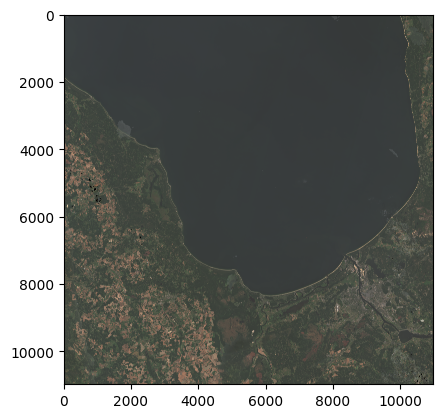

In [7]:
plt.imshow(T34VFJ)

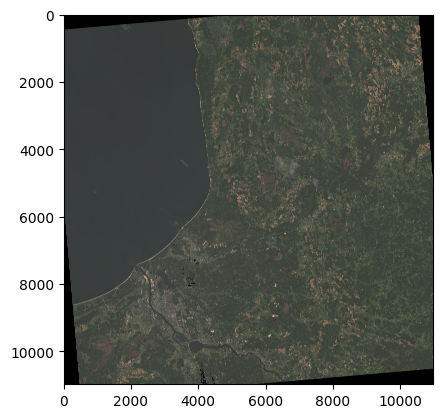

In [8]:
plt.imshow(T35VLD)

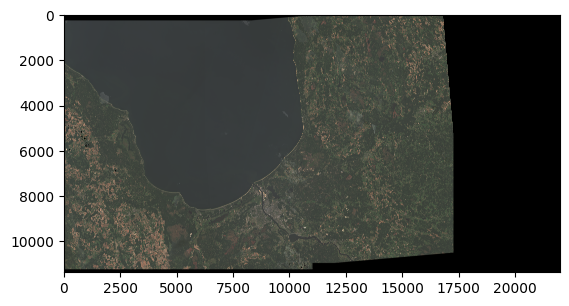

In [9]:
plt.imshow(merged)